(xspec-models)=

# Use Xspec Models

```{admonition} Warning
:class: warning

🚧 This is an experimental feature!

We found the [issue](https://github.com/wcxve/elisa/issues/46) that computation of some Xspec models cannot be done in parallel, and should be done in sequential, which can be slow. We are working on it to improve the performance.
```

``elisa`` can use the models available in Xspec. Before using them, **you need to install the [``xspex``](https://github.com/wcxve/xspex) package, following {ref}`installation`.**

In [1]:
from elisa import Data, BayesFit
from elisa.models import xspec, PhAbs

LE = Data(
    erange=[1.5, 10],
    specfile='data/P011160500104_LE.pi',
    backfile='data/P011160500104_LE.bak',
    respfile='data/P011160500104_LE.rsp',
    group='opt',
)

ME = Data(
    erange=[10, 35],
    specfile='data/P011160500104_ME.pi',
    backfile='data/P011160500104_ME.bak',
    respfile='data/P011160500104_ME.rsp',
    group='opt',
)

HE = Data(
    erange=[28, 250],
    specfile='data/P011160500104_HE.pi',
    backfile='data/P011160500104_HE.bak',
    respfile='data/P011160500104_HE.rsp',
    group='opt',
)

data = [LE, ME, HE]

model = PhAbs() * xspec.powerlaw()

/var/folders/x2/2nnbgrmj3hl3pq2x07gxnt540000gn/T/ipykernel_99778/1756778857.py:4: Warning: spectrum (data/P011160500104_LE.bak) has zero statistical errors, which may lead to wrong result under Gaussian statistics, consider to group the spectrum
  LE = Data(
/var/folders/x2/2nnbgrmj3hl3pq2x07gxnt540000gn/T/ipykernel_99778/1756778857.py:12: Warning: spectrum (data/P011160500104_ME.bak) has zero statistical errors, which may lead to wrong result under Gaussian statistics, consider to group the spectrum
  ME = Data(
/var/folders/x2/2nnbgrmj3hl3pq2x07gxnt540000gn/T/ipykernel_99778/1756778857.py:20: Warning: spectrum (data/P011160500104_HE.bak) has zero statistical errors, which may lead to wrong result under Gaussian statistics, consider to group the spectrum
  HE = Data(


In [2]:
fit = BayesFit(data, model)
fit

Bayesian Fit

┌──────┬──────────────────┬───────────┐
│ Data │      Model       │ Statistic │
├──────┼──────────────────┼───────────┤
│  LE  │ PhAbs * powerlaw │   pgstat  │
├──────┼──────────────────┼───────────┤
│  ME  │ PhAbs * powerlaw │   pgstat  │
├──────┼──────────────────┼───────────┤
│  HE  │ PhAbs * powerlaw │   pgstat  │
└──────┴──────────────────┴───────────┘

┌─────┬───────────┬───────────┬───────┬───────────────────────┐
│ No. │ Component │ Parameter │ Value │         Prior         │
├─────┼───────────┼───────────┼───────┼───────────────────────┤
│  1  │   PhAbs   │     nH    │   1   │   Uniform(0, 1e+06)   │
├─────┼───────────┼───────────┼───────┼───────────────────────┤
│  2  │  powerlaw │  PhoIndex │   1   │    Uniform(-3, 10)    │
├─────┼───────────┼───────────┼───────┼───────────────────────┤
│  3  │  powerlaw │    norm   │   1   │ Uniform(1e-10, 1e+10) │
└─────┴───────────┴───────────┴───────┴───────────────────────┘

In [3]:
posterior = fit.nuts()
posterior

  0%|          | 0/22000 [00:00<?, ?it/s]

  0%|          | 0/22000 [00:00<?, ?it/s]

  0%|          | 0/22000 [00:00<?, ?it/s]

  0%|          | 0/22000 [00:00<?, ?it/s]

/Users/xuewc/Library/Application Support/hatch/env/virtual/elisa-lib/wjD8RhHH/elisa-lib/lib/python3.9/site-packages/arviz/stats/stats.py:1632: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Parameters
┌───────────────────┬────────┬──────────┬────────┬───────────────────────┬───────┬──────┐
│     Parameter     │  Mean  │   Std    │ Median │   68.3% Quantile CI   │  ESS  │ Rhat │
├───────────────────┼────────┼──────────┼────────┼───────────────────────┼───────┼──────┤
│      PhAbs.nH     │ 0.3544 │ 0.009201 │ 0.3544 │ [-0.009246, 0.009294] │ 28033 │ 1.00 │
├───────────────────┼────────┼──────────┼────────┼───────────────────────┼───────┼──────┤
│ powerlaw.PhoIndex │ 2.118  │ 0.002189 │ 2.118  │ [-0.002188, 0.002204] │ 32544 │ 1.00 │
├───────────────────┼────────┼──────────┼────────┼───────────────────────┼───────┼──────┤
│   powerlaw.norm   │ 8.901  │ 0.04599  │  8.9   │  [-0.04541, 0.04667]  │ 29385 │ 1.00 │
└───────────────────┴────────┴──────────┴────────┴───────────────────────┴───────┴──────┘

Fit Statistics
┌───────┬───────────┬────────────┬────────────┬──────────┐
│  Data │ Statistic │    Mean    │   Median   │ Channels │
├───────┼───────────┼────────────┼────────────┼──────────┤
│   LE  │   pgstat  │   122.19   │   121.62   │    96    │
├───────┼───────────┼────────────┼────────────┼──────────┤
│   ME  │   pgstat  │   18.03    │   17.63    │    17    │
├───────┼───────────┼────────────┼────────────┼──────────┤
│   HE  │   pgstat  │   30.62    │   29.99    │    28    │
├───────┼───────────┼────────────┼────────────┼──────────┤
│ Total │  stat/dof │ 170.84/138 │ 170.21/138 │   141    │
└───────┴───────────┴────────────┴────────────┴──────────┘

Information Criterion
┌────────┬────────────────┬──────┐
│ Method │    Deviance    │  p   │
├────────┼────────────────┼──────┤
│ LOOIC  │ 175.32 ± 22.79 │ 4.22 │
├────────┼────────────────┼──────┤
│  WAIC  │ 175.28 ± 22.78 │ 4.20 │
└────────┴────────────────┴──────┘

Pareto k diagnostic
┌─────────────┬──────────┬───────┬────────┐
│    Range    │   Flag   │ Count │  Pct.  │
├─────────────┼──────────┼───────┼────────┤
│ (-Inf, 0.5] │   good   │  141  │ 100.0% │
├─────────────┼──────────┼───────┼────────┤
│  (0.5, 0.7] │    ok    │   0   │  0.0%  │
├─────────────┼──────────┼───────┼────────┤
│   (0.7, 1]  │   bad    │   0   │  0.0%  │
├─────────────┼──────────┼───────┼────────┤
│   (1, Inf)  │ very bad │   0   │  0.0%  │
└─────────────┴──────────┴───────┴────────┘

{'spec': <Figure size 800x700 with 3 Axes>}

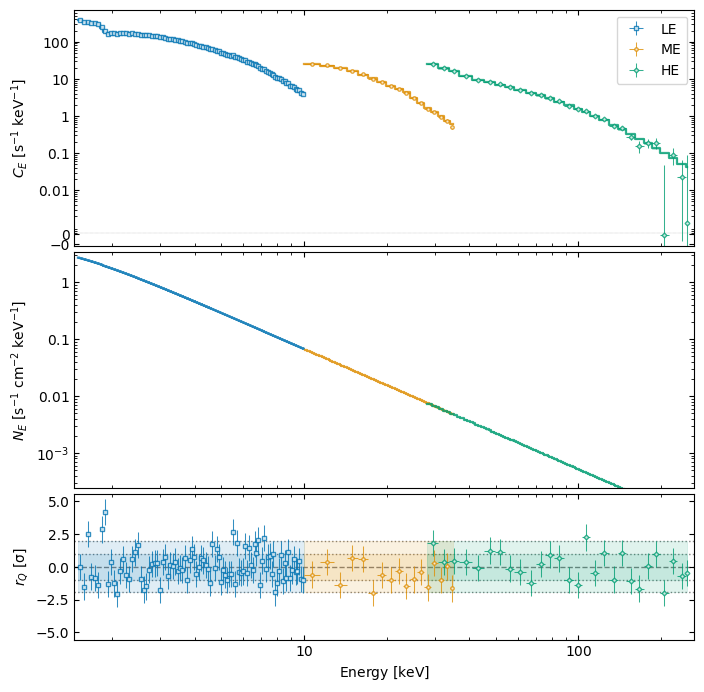

In [4]:
posterior.plot()